In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# %matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/store_sku_ba_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store ID      1000 non-null   object 
 1   SKU ID        1000 non-null   object 
 2   Total Visits  1000 non-null   int64  
 3   Transactions  1000 non-null   int64  
 4   Revenue       1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [4]:
df.head()

,Store ID,SKU ID,Total Visits,Transactions,Revenue
0,Store_1,SKU_1,606,573,74688.67
1,Store_1,SKU_2,695,27,1390.60
2,Store_1,SKU_3,389,285,50679.63
3,Store_1,SKU_4,689,505,16764.34
4,Store_1,SKU_5,522,230,41928.40


In [5]:
stores = df['Store ID'].unique()
stores

array(['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11',
       'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16',
       'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21',
       'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36',
       'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41',
       'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Store_46',
       'Store_47', 'Store_48', 'Store_49', 'Store_50'], dtype=object)

In [6]:
products = df['SKU ID'].unique()
products

array(['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6', 'SKU_7',
       'SKU_8', 'SKU_9', 'SKU_10', 'SKU_11', 'SKU_12', 'SKU_13', 'SKU_14',
       'SKU_15', 'SKU_16', 'SKU_17', 'SKU_18', 'SKU_19', 'SKU_20'],
      dtype=object)

In [7]:
print(f"Total Number of Stores = {len(stores)}")
print(f"Total Number of product = {len(products)}")

Total Number of Stores = 50
Total Number of product = 20


# Data Cleaning

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Store ID', 'SKU ID', 'Total Visits', 'Transactions', 'Revenue'], dtype='object')

    INFO: There are total 1000 rows having 50 store and 20 products. There are no duplicate or unfilled value.

# Feature Engineering

In [10]:
# ['Store ID', 'SKU ID', 'Total Visits', 'Transactions', 'Revenue']

#### TASK 1: Calculate the conversion rate at both the store level and the SKU level (i.e., Transactions /Total Visits).

#### Store level conversion rate

In [11]:
df_store_level = df.groupby('Store ID')[['Total Visits', 'Transactions']].sum()

In [12]:
df_store_level

,Total Visits,Transactions
Store ID,,
Store_1,11296,6054
Store_10,12173,6311
Store_11,9362,4526
Store_12,8698,3310
Store_13,11846,5155
Store_14,12804,4674
Store_15,8922,3090
Store_16,11857,6122
Store_17,11468,5575


In [13]:
df_store_level['Conversion Rate'] = df_store_level['Transactions']/df_store_level['Total Visits']

In [14]:
df_store_level

,Total Visits,Transactions,Conversion Rate
Store ID,,,
Store_1,11296,6054,0.535942
Store_10,12173,6311,0.518442
Store_11,9362,4526,0.483444
Store_12,8698,3310,0.380547
Store_13,11846,5155,0.435168
Store_14,12804,4674,0.365042
Store_15,8922,3090,0.346335
Store_16,11857,6122,0.516319
Store_17,11468,5575,0.486135


In [15]:
df_store_level = df_store_level.reset_index()
pickle.dump(df_store_level, open("../Datasets/processed_data/store_level_transaction.pkl", 'wb'))

#### SKU-Level Conversion Rate

In [16]:
df_sku_level = df.groupby('SKU ID')[['Total Visits', 'Transactions']].sum().reset_index()
df_sku_level['Conversion Rate'] = df_sku_level['Transactions'] / df_sku_level['Total Visits']

In [17]:
df_sku_level

,SKU ID,Total Visits,Transactions,Conversion Rate
0,SKU_1,25111,13306,0.529887
1,SKU_10,27641,14333,0.518541
2,SKU_11,27856,16323,0.585978
3,SKU_12,27687,11569,0.417850
4,SKU_13,26734,12703,0.475163
5,SKU_14,24225,12660,0.522601
6,SKU_15,29758,15045,0.505578
7,SKU_16,23574,12906,0.547468
8,SKU_17,25295,11511,0.455070
9,SKU_18,27181,13679,0.503256


In [18]:
pickle.dump(df_sku_level, open("../Datasets/processed_data/sku_level_transation.pkl", 'wb'))

In [19]:
top_stores = df_store_level.sort_values(by='Conversion Rate', ascending=False).head(10)
bottom_stores = df_store_level.sort_values(by='Conversion Rate', ascending=True).head(10)

In [20]:
top_stores

,Store ID,Total Visits,Transactions,Conversion Rate
32,Store_39,9213,6124,0.664713
43,Store_49,11032,7129,0.646211
38,Store_44,8482,5356,0.631455
30,Store_37,9458,5937,0.627723
41,Store_47,9753,6081,0.623500
48,Store_8,8794,5443,0.618945
31,Store_38,8975,5518,0.614819
44,Store_5,11997,7275,0.606402
37,Store_43,12664,7616,0.601390
20,Store_28,12186,7238,0.593960


In [21]:
bottom_stores

,Store ID,Total Visits,Transactions,Conversion Rate
6,Store_15,8922,3090,0.346335
5,Store_14,12804,4674,0.365042
29,Store_36,10149,3819,0.376293
23,Store_30,10659,4043,0.379304
3,Store_12,8698,3310,0.380547
15,Store_23,9411,3759,0.399426
49,Store_9,10245,4208,0.410737
12,Store_20,9062,3756,0.414478
16,Store_24,10295,4313,0.418941
28,Store_35,10257,4359,0.424978


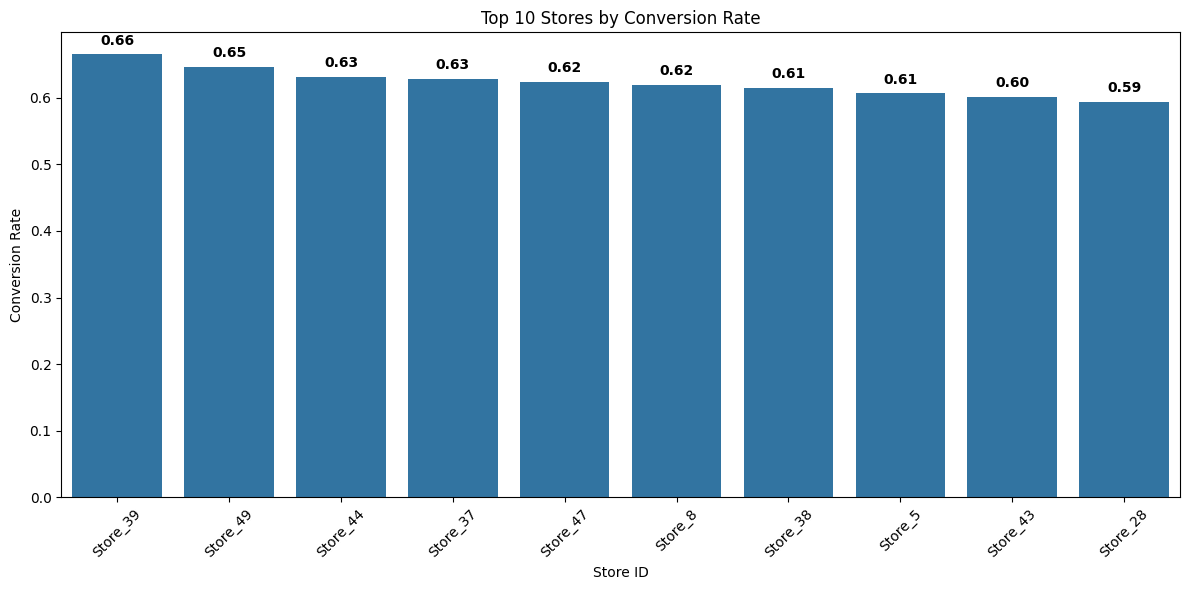

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Store ID', y='Conversion Rate', data=top_stores)

plt.title('Top 10 Stores by Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()

top_stores = top_stores.reset_index()
for i, row in top_stores.iterrows():
    ax.text(
        x=i, 
        y=row['Conversion Rate'] + 0.01,
        s=f"{row['Conversion Rate']:.2f}", 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
plt.show()

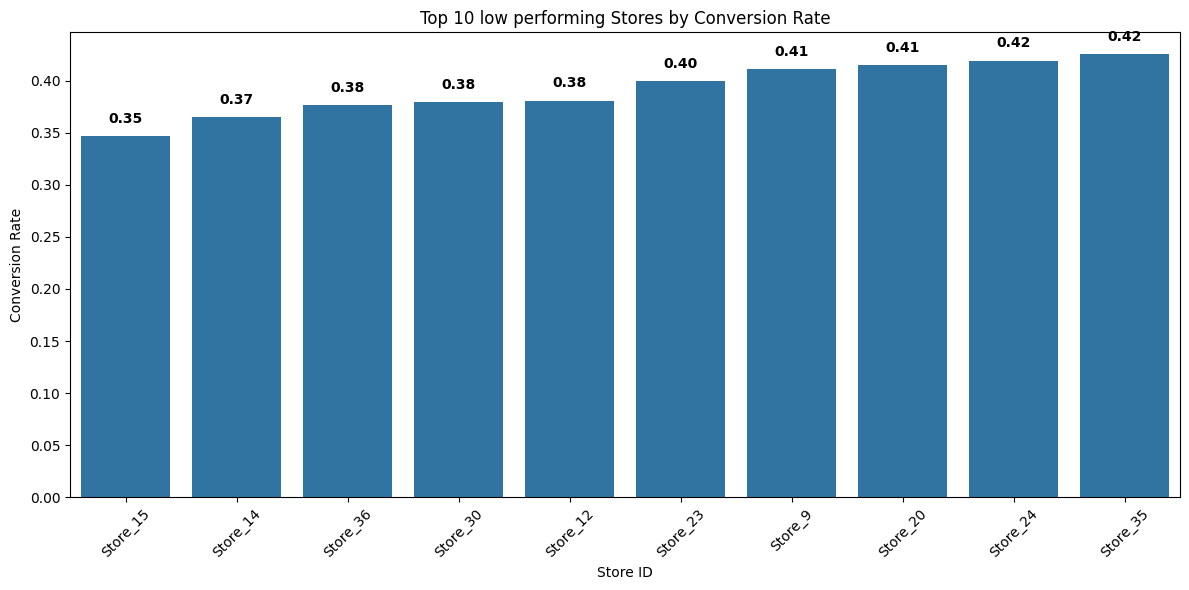

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Store ID', y='Conversion Rate', data=bottom_stores)
plt.title('Top 10 low performing Stores by Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
bottom_stores = bottom_stores.reset_index()
for i, row in bottom_stores.iterrows():
    ax.text(
        x=i, 
        y=row['Conversion Rate'] + 0.01,
        s=f"{row['Conversion Rate']:.2f}", 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
plt.show()

In [28]:
print(f"Least performing stores = {bottom_stores['Store ID'].values}")
print(f"Better performing stores = {top_stores['Store ID'].values}")

Least performing stores = ['Store_15' 'Store_14' 'Store_36' 'Store_30' 'Store_12' 'Store_23'
 'Store_9' 'Store_20' 'Store_24' 'Store_35']
Better performing stores = ['Store_39' 'Store_49' 'Store_44' 'Store_37' 'Store_47' 'Store_8'
 'Store_38' 'Store_5' 'Store_43' 'Store_28']


    Insight Obtained: ['Store_15' 'Store_14' 'Store_36' 'Store_30' 'Store_12' 'Store_23' 'Store_9' 'Store_20' 'Store_24' 'Store_35'] - These shops needs attaintion to perform well by doing advertisements and providing facilities to the stores

    ['Store_39' 'Store_49' 'Store_44' 'Store_37' 'Store_47' 'Store_8' 'Store_38' 'Store_5' 'Store_43' 'Store_28'] - These are the 